[Reference](https://faun.pub/pyviz-the-underrated-python-visualization-tool-42ca60d51a39)

In [2]:
!pip install hvplot

     |████████████████████████████████| 3.1 MB 5.4 MB/s 


In [4]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
# Import libraries and dependencies
import pandas as pd
import hvplot.pandas

import yfinance as yf

import seaborn as sns
import panel as pn
import matplotlib.pyplot as plt
%matplotlib inline

# Donwload data from yfinance
crypto_df = yf.download(tickers = "BTC-USD ETH-USD DOGE-USD ADA-USD", start = "2021-09-01", end = "2021-10-01")

[*********************100%***********************]  4 of 4 completed


In [6]:
# Slice for "Adj Close" column only
close_df = crypto_df["Adj Close"]

# Visualize top rows
close_df.head()

# Get daily returns, drop null values
daily_returns = close_df.pct_change().dropna()*100

# Visualize top rows
daily_returns.head()

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD
Date,,,,
2021-09-02,3.228089,0.984083,0.527856,-1.143158
2021-09-03,0.162009,1.414321,0.107446,3.946852
2021-09-04,-4.562705,-0.161418,1.051395,-1.339547
2021-09-05,2.754053,3.621581,5.056654,1.654013
2021-09-06,-2.711502,1.700613,-1.831961,-0.601046


In [7]:
# Get average daily returns
average_returns = daily_returns.mean()*100
average_returns

ADA-USD    -65.955315
BTC-USD      4.074696
DOGE-USD   -77.163872
ETH-USD    -34.148767
dtype: float64

In [8]:
# Create bar chart
return_bar = average_returns.hvplot.bar(
               xlabel = "Crypto Tickers", 
               ylabel = "Average Percentage Change", 
               title = "Cryptocurriences Average Percentage Change on September 2021")

In [9]:
# Create line chart
return_line = daily_returns.hvplot.line(
               xlabel = "Date", 
               ylabel = "Percentage Change", 
               title = "Cryptocurriences Daily Returns",
               legend = "right")

In [10]:
# Create correlation heatmap
def correlation_plot():
    correlation_fig = plt.figure()
    correlation = sns.heatmap(daily_returns.corr()).set_title("Correlation Heatmap")
    plt.close(correlation_fig)
    return pn.pane.Matplotlib(correlation_fig, tight=True)

In [11]:
# Build dashboard
dashboard = pn.Column(
    "#Cryptocurrencies Analysis Dashboard",
    return_bar,
    "The bar chart above displays the average percentage change for each of the analyzed cryptocurrencies. The higher the percentage change the better for the investor, since he/she would have a better return on his/her investment.",
    "Acording to the bar chart, Bitcoin (BTC-USD) represnts the best option for investors interested in cryptocurrencies.",
    return_line,    
    "The line chart above visualizes the daily returns for the analyzed cryptocurrencies. This helps investors understand the cryptocurrencies volatility over time and in respect with one another.",
    "According to the line chart, it can be assumed that these four cryptocurrencies follow a similar trend across time.",
     correlation_plot(),
    "The correlation heatmap above helps understanding the dependency between the four analyzed cryptocurrencies.",
    "According to the correlation plot, all four cryptocurrencies have strong positive correlation between each other, which means that if the value of one cryptocurrency increases, it is expected that the value of the other ones will increase as well.",
    "*---*",
    "***Dashboard Created by: Justin Farnan***")

Column
    [0] Markdown(str)
    [1] HoloViews(Bars)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] HoloViews(NdOverlay)
    [5] Markdown(str)
    [6] Markdown(str)
    [7] Matplotlib(Figure, tight=True)
    [8] Markdown(str)
    [9] Markdown(str)
    [10] Markdown(str)
    [11] Markdown(str)
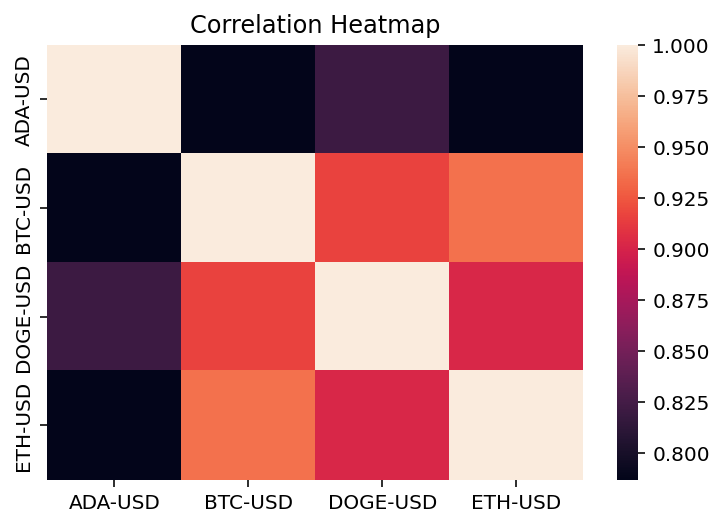

In [12]:
# Visualize dashboard
dashboard